## Praca domowa 4

#### Autor: Michał Gromadzki, 313356

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [65]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

In [62]:
# a)
df.loc[(df.Publisher=="Nintendo") & (df.Year>2015) & (df.NA_Sales<df.EU_Sales)].reset_index()

,index,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,4199,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
1,6477,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
2,14703,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


In [68]:
# b)
df.loc[df.Year==2010].groupby("Genre").Global_Sales.agg("sum").to_frame().head(1)

,Global_Sales
Genre,
Action,117.64


In [69]:
# c)
dfpom=df.rename(columns ={"Genre" : "Typ Gry"})
df1=dfpom.groupby("Typ Gry").JP_Sales.agg("mean").to_frame()
df2=dfpom.groupby("Typ Gry").EU_Sales.agg("mean").to_frame()
df3=df1.merge(df2, on="Typ Gry")
final=df3.loc[df3.JP_Sales>df3.EU_Sales].sort_values(by="JP_Sales").rename(columns ={"JP_Sales" : "Średnia sprzedaż w Japonii"}).drop(columns="EU_Sales")
final

,Średnia sprzedaż w Japonii
Typ Gry,
Strategy,0.073284
Puzzle,0.099439
Role-Playing,0.238293


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

### Oryginalny wykres wraz ze źródłem

![](Przechwytywanie.png "")
Źródło: https://www.politico.com/news/2021/10/21/covid-american-cities-charts-516295

### Wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił

![](Przechwytywanie1.png "")
Link: https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/GromadzkiMicha%C5%82/twd_hw2.pdf

###  Poprawiony wykres z punktu 2) w Pythonie

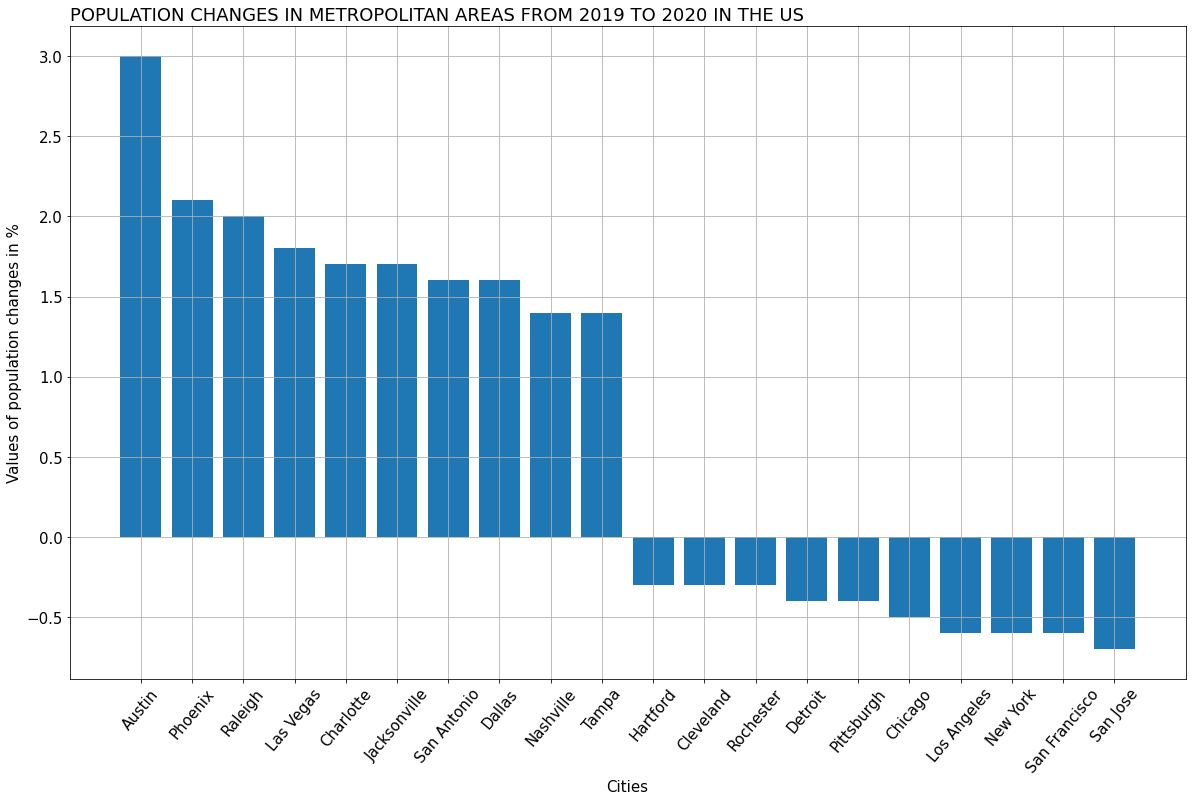

In [8]:
import matplotlib.pyplot as plt
x = ["Austin","Phoenix","Raleigh","Las Vegas","Charlotte","Jacksonville","San Antonio",
                     "Dallas","Nashville","Tampa","Cleveland","Hartford","Rochester","Detroit",
                     "Pittsburgh","Chicago","Los Angeles","New York","San Francisco","San Jose"]

y=[3,1.7,-0.5,-0.3,1.6,-0.4,-0.3,1.7,1.8,-0.6,1.4,-0.6,2.1,-0.4,2,-0.3,1.6,-0.6,-0.7,1.4]
x=sorted(x)
wynik=[]
for i in range(len(x)):
    wynik.append([x[i],y[i]])
    
wynik=pd.DataFrame(wynik)
wynik=wynik.rename(columns={0 : "Miasta", 1 : "val"})
wynik=wynik.sort_values(by="val",ascending=False)
plt.figure(figsize=(20, 12))
plt.bar(wynik.Miasta,wynik.val)
plt.xticks(rotation=50)
plt.ylabel("Values of population changes in %")
plt.xlabel("Cities")
plt.title("POPULATION CHANGES IN METROPOLITAN AREAS FROM 2019 TO 2020 IN THE US",loc="left")
plt.rcParams.update({'font.size': 15})
plt.grid()

### Uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

1. Z wykresu łatwiej niż z poprzednich można odczytać wartości dla poszczególnych miast, skala jest dużo bardziej przejrzysta.
2. Porównywanie wysokości słupków jest łatwiejsze od porównywania wielkości kropek czy wysokości strzałek. Ułatwia to porównywanie zmian między miastami.